# Clustermap of numerical values

In [2]:
import pandas as pd 
import seaborn as sns 
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline


In [3]:
matrix = pd.read_csv("distance_tables/distance_table_2000-4000MFW_wurzburg_incl_AnonymEnfant.csv", sep=",", encoding="utf8",index_col=0)  # CSV mit Komma als Trennzeichen
print(matrix.head())

                Anonym_Enfant  Arnaud_Adelson  Arnaud_Anne  Arnaud_Bal  \
Anonym_Enfant        0.000000        1.077994     1.106627    0.991919   
Arnaud_Adelson       1.077994        0.000000     0.741848    0.903604   
Arnaud_Anne          1.106627        0.741848     0.000000    0.941098   
Arnaud_Bal           0.991919        0.903604     0.941098    0.000000   
Arnaud_Batilde       1.135877        0.764179     0.760712    0.897679   

                Arnaud_Batilde  Arnaud_Clary  Arnaud_Epoux  Arnaud_Fanny  \
Anonym_Enfant         1.135877      1.096546      1.123714      1.101878   
Arnaud_Adelson        0.764179      0.802977      0.645511      0.746092   
Arnaud_Anne           0.760712      0.748197      0.640682      0.672353   
Arnaud_Bal            0.897679      0.946358      0.797390      0.888091   
Arnaud_Batilde        0.000000      0.794358      0.698827      0.804697   

                Arnaud_Julie  Arnaud_Lucie  ...  Voltaire_Eloge  \
Anonym_Enfant       1.094600   

In [4]:
# Alphabetische Sortierung
matrix = matrix.sort_index(axis=0).sort_index(axis=1)

c:\Users\Administrator\pythonenv\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Administrator\pythonenv\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


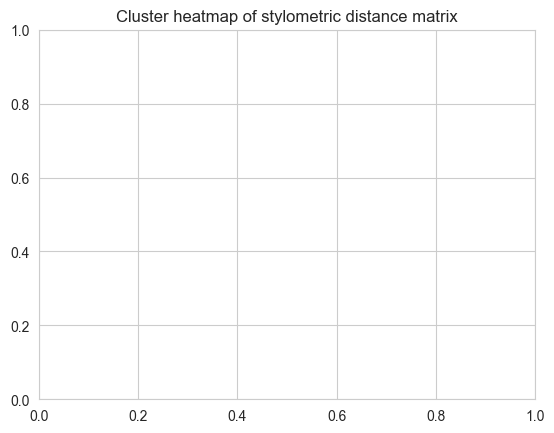

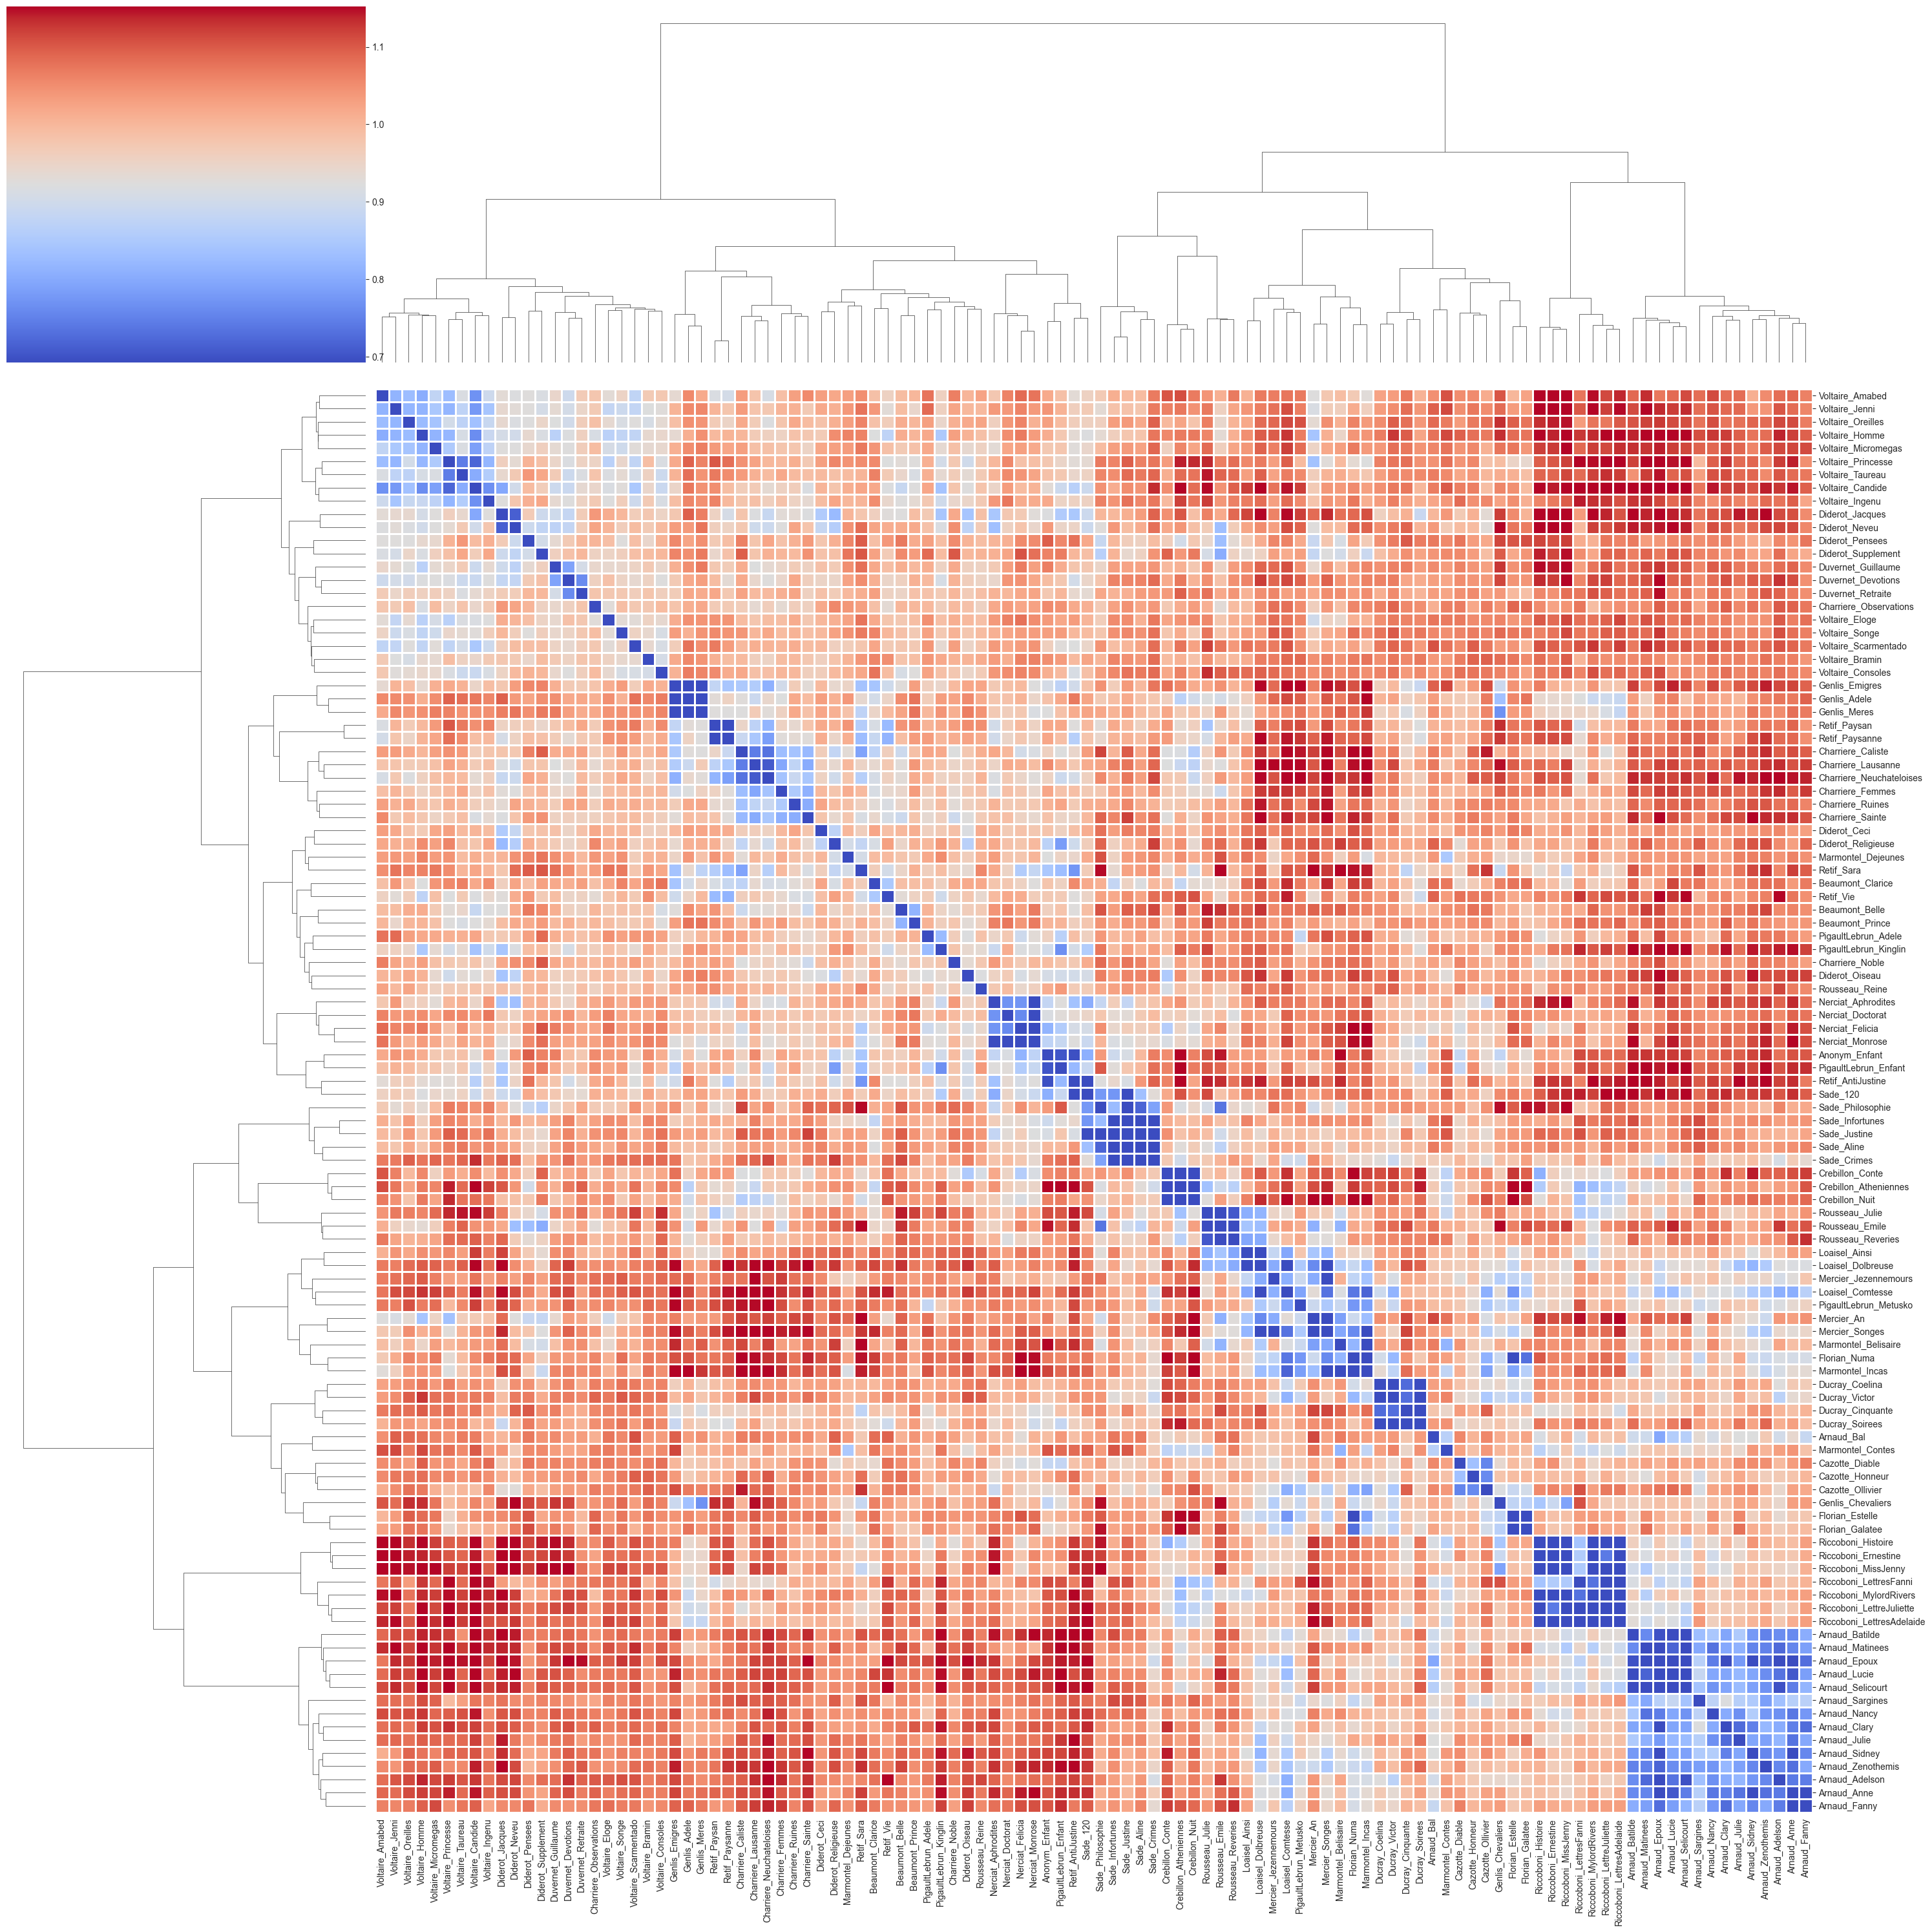

In [37]:
sns.set_style("whitegrid")
plt.figure()
plt.title("Cluster heatmap of stylometric distance matrix")
sns.clustermap(
        data=matrix,
        method="ward", # ward|centroid etc.
        robust=True,
        figsize=(30,30),
        #annot=True,
        square=False,
        linewidths=0.8,
        linecolor="white",
        cmap="coolwarm",
        row_cluster=True,
        #cbar=True,    
        )
plt.tight_layout()
plt.show()
#plt.savefig("clustermapfile.png", dpi=300)
plt.close()

c:\Users\Administrator\pythonenv\lib\site-packages\seaborn\matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
c:\Users\Administrator\pythonenv\lib\site-packages\seaborn\matrix.py:530: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


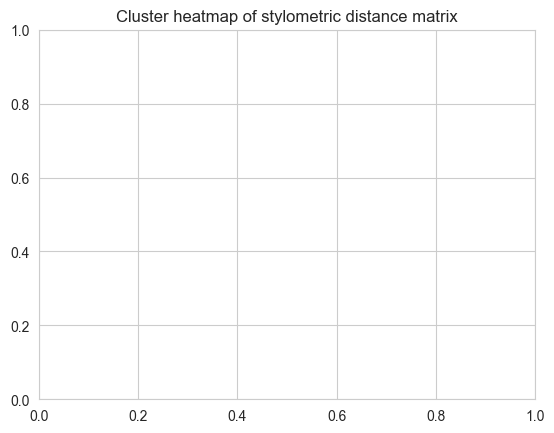

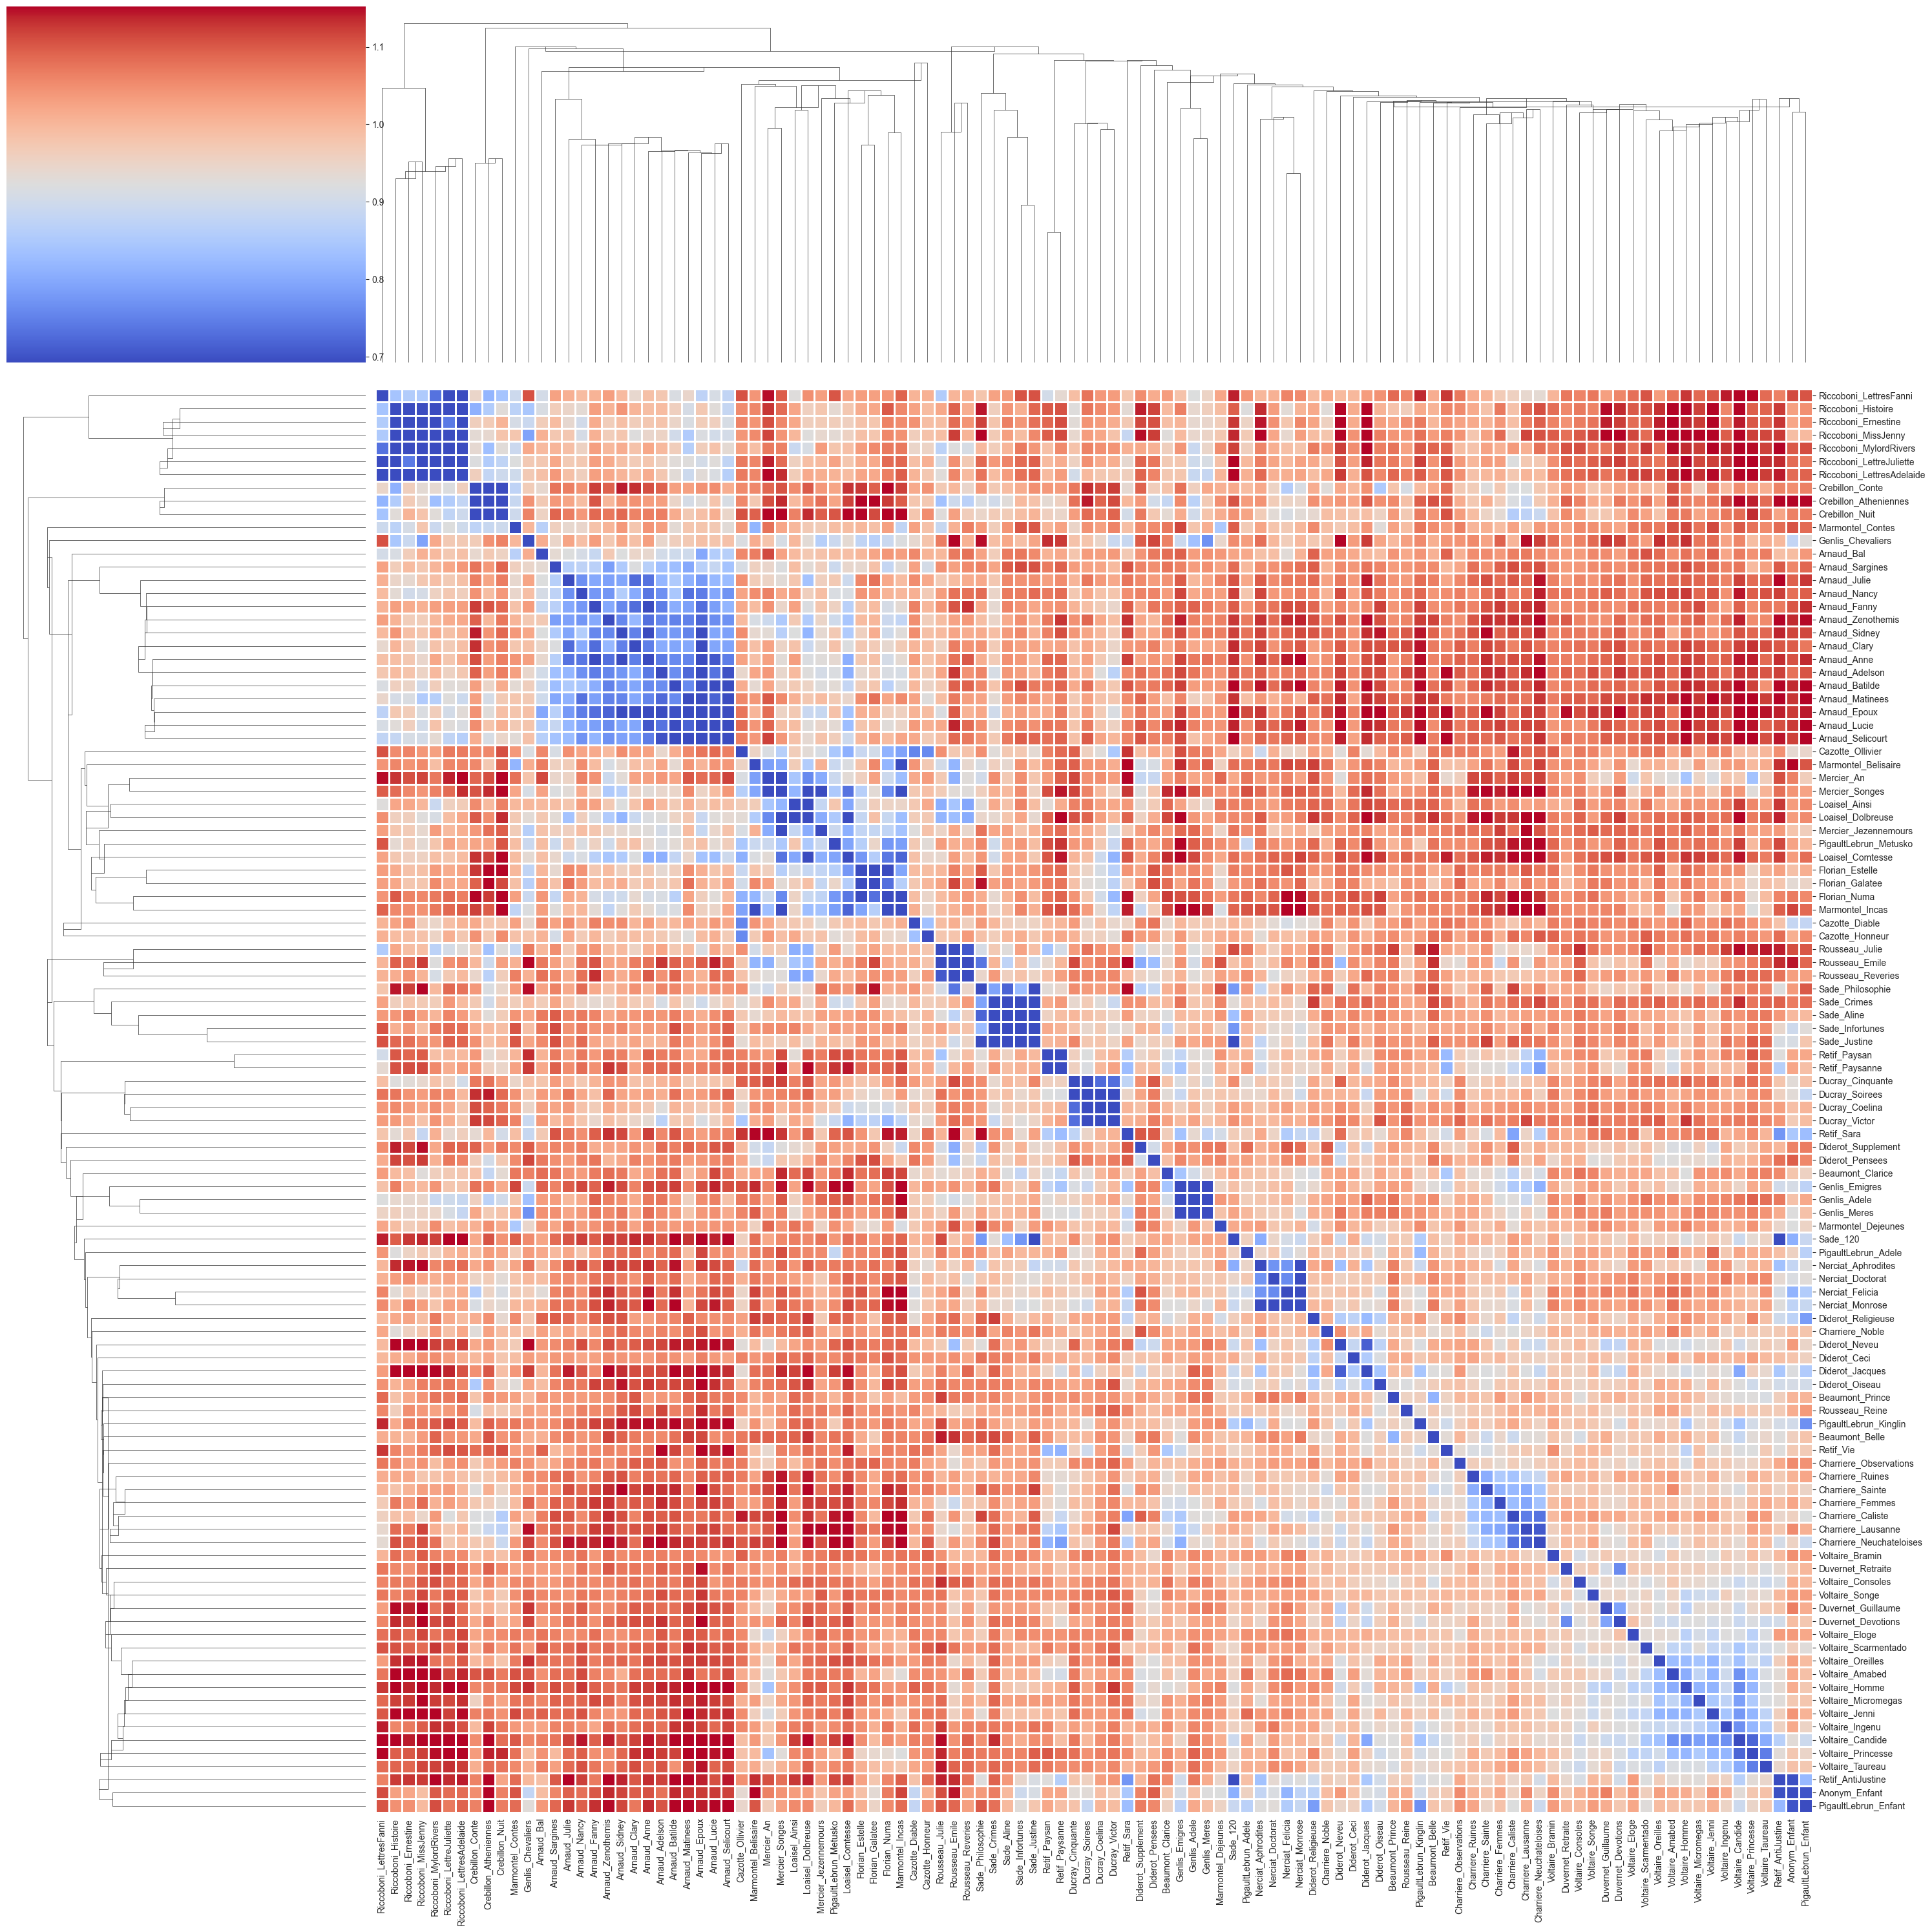

In [5]:
sns.set_style("whitegrid")
plt.figure()
plt.title("Cluster heatmap of stylometric distance matrix")
sns.clustermap(
        data=matrix,
        method="centroid", # ward|centroid etc.
        robust=True,
        figsize=(30,30),
        #annot=True,
        square=False,
        linewidths=0.8,
        linecolor="white",
        cmap="coolwarm",
        row_cluster=True,
        #cbar=True,    
        )
plt.tight_layout()
plt.show()
#plt.savefig("clustermapfile.png", dpi=300)
plt.close()

# Cluster visualization

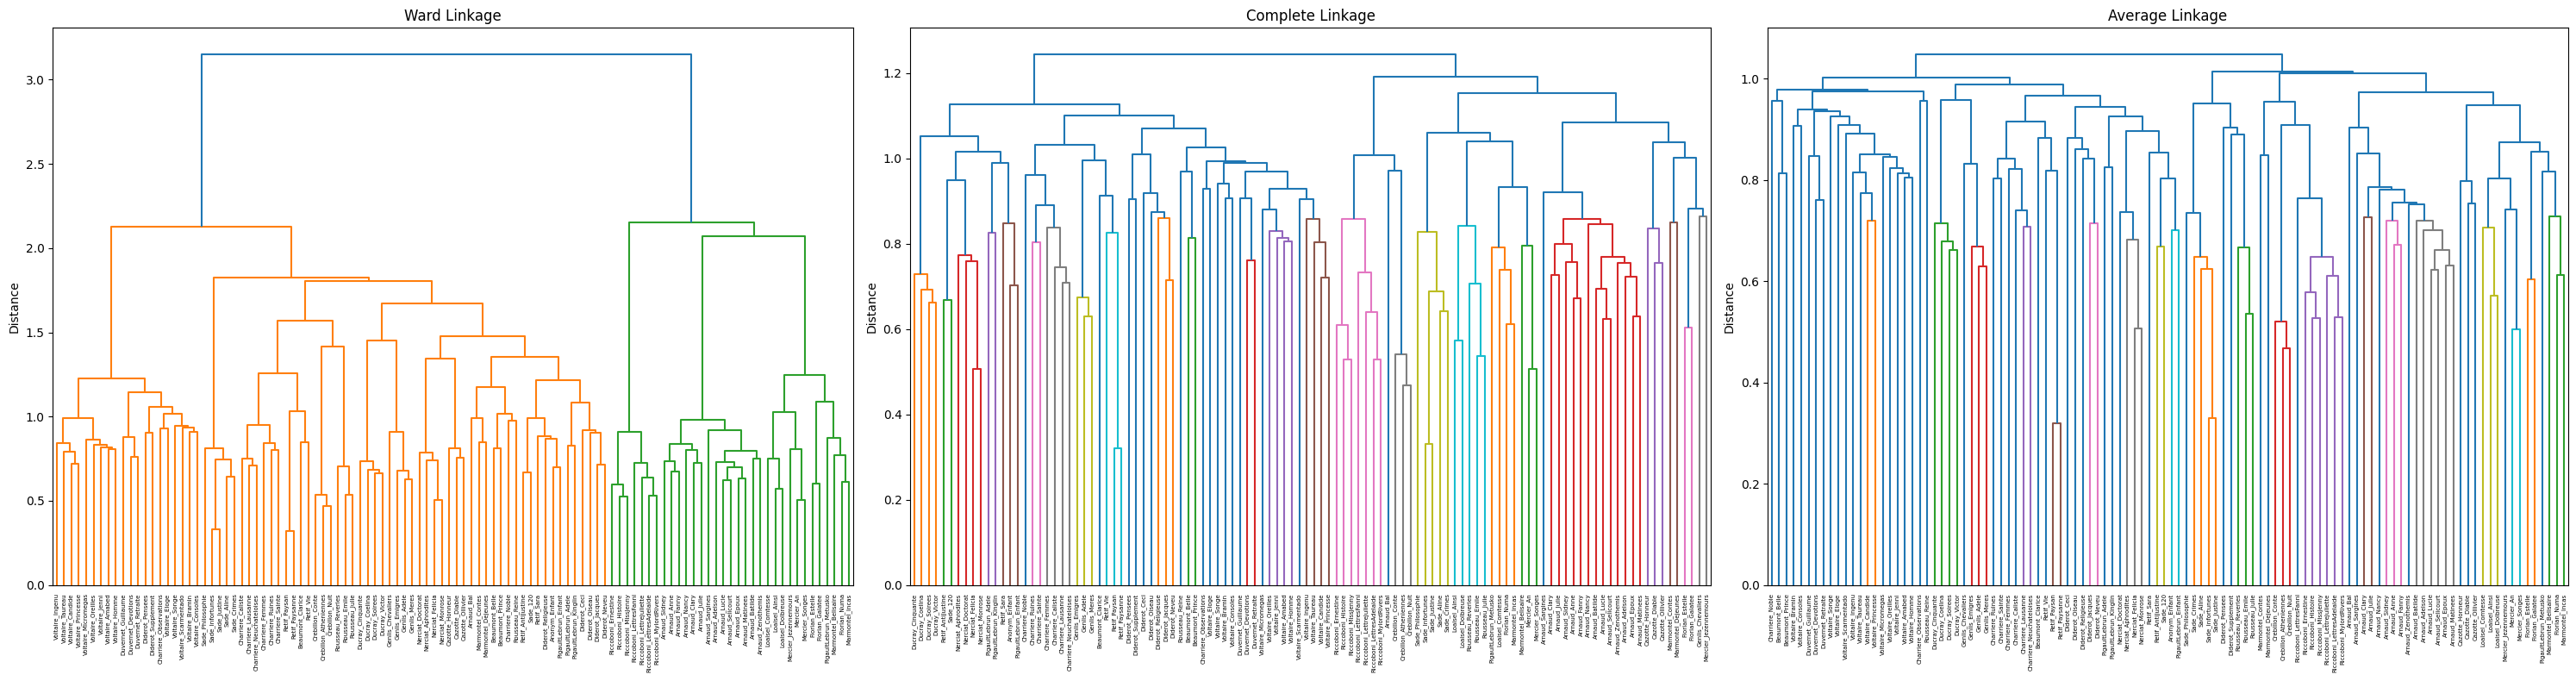

In [8]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
from scipy.spatial.distance import squareform

# Datei laden
distance_file = "distance_tables/distance_table_2000-4000MFW_wurzburg_incl_AnonymEnfant.csv"
distance_df = pd.read_csv(distance_file, index_col=0)

# Distanzmatrix extrahieren
distance_matrix = distance_df.values

# Umwandlung in ein 1D-Distanzarray für scipy
condensed_matrix = squareform(distance_matrix)

# Linkage-Methoden definieren
linkage_methods = {
    "Ward Linkage": "ward",
    "Complete Linkage": "complete",
    "Average Linkage": "average"
}

# Dendrogramme plotten
fig, axes = plt.subplots(1, 3, figsize=(30, 8))
for ax, (title, method) in zip(axes, linkage_methods.items()):
    linkage_matrix = sch.linkage(condensed_matrix, method=method)
    sch.dendrogram(linkage_matrix, ax=ax, labels=distance_df.index, leaf_rotation=90)
    ax.set_title(title)
    ax.set_ylabel("Distance")
plt.tight_layout()
plt.show()
